In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
pd.set_option('display.max_columns', None)

In [81]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [82]:
df.duplicated().sum()

0

In [83]:
df.shape

(3650, 23)

In [84]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

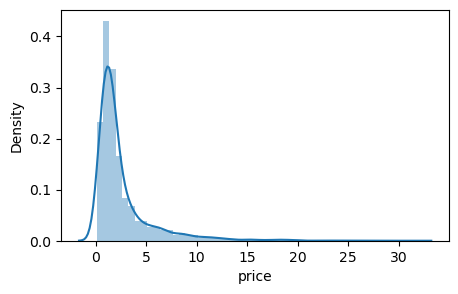

In [85]:
sns.distplot(df['price'])

<Axes: xlabel='price'>

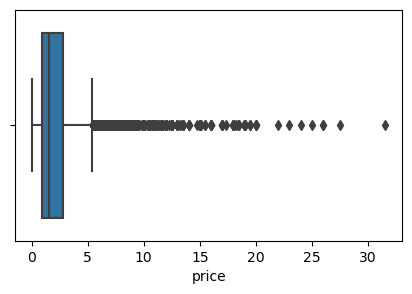

In [86]:
sns.boxplot(x=df['price'])

In [87]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(422,
 count    422.000000
 mean       9.247370
 std        4.074681
 min        5.460000
 25%        6.470000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


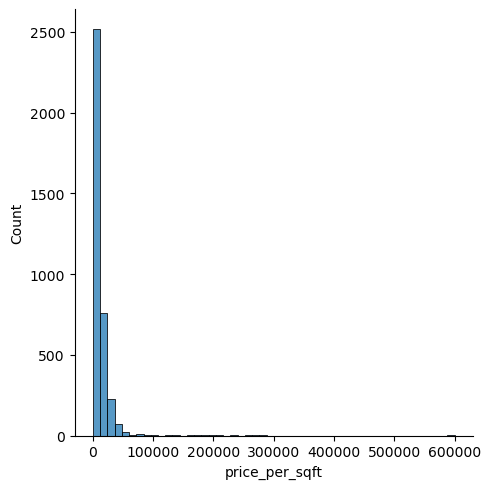

In [88]:
sns.displot(df['price_per_sqft'],bins = 50)

In [89]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(345,
 count       345.000000
 mean      46803.115942
 std       50665.784059
 min       24366.000000
 25%       27871.000000
 50%       33333.000000
 75%       40850.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [90]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [91]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [92]:
outliers_sqft['price_per_sqft'].describe()

count      345.000000
mean     29516.568116
std      12347.724912
min       2723.000000
25%      25562.000000
50%      29880.000000
75%      35741.000000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [93]:
df.update(outliers_sqft)

In [94]:
plt.rcParams['figure.figsize'] = [5, 3]  # Example size, adjust as needed


C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\2186227091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

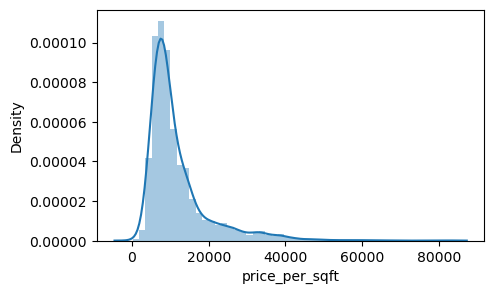

In [95]:
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

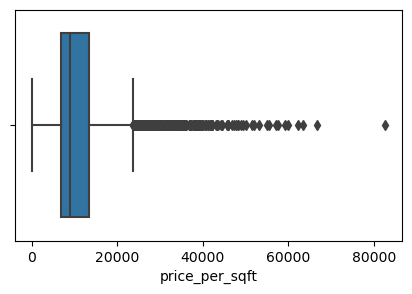

In [96]:
sns.boxplot(x=df['price_per_sqft'])

In [97]:
df[df['price_per_sqft']>50000].shape

(13, 23)

In [98]:
df = df[df['price_per_sqft'] <= 50000]

C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

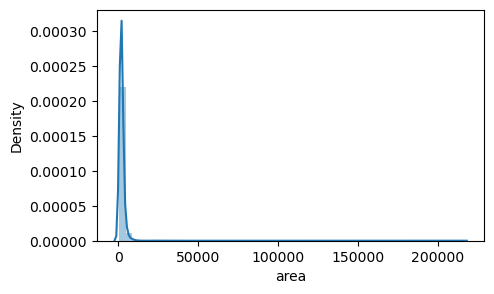

In [99]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

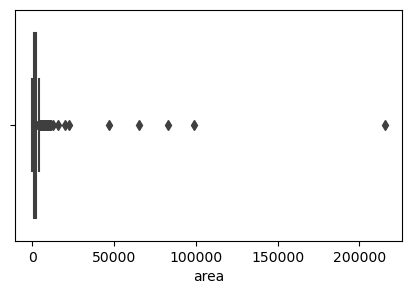

In [100]:
sns.boxplot(x=df['area'])

In [101]:
df['area'].describe()

count      3620.000000
mean       2105.432320
std        4517.341634
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2340.000000
max      215517.000000
Name: area, dtype: float64

In [102]:
df[df['area'] >= 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2916,house,independent,sector 50,5.0,232.0,215517.0,plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,new property,NaN,2.0,NaN,1,1,0,1,1,1,0


In [103]:
df.drop(2916,inplace = True )

<Axes: xlabel='area'>

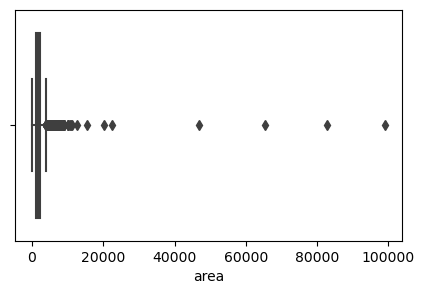

In [104]:
sns.boxplot(x=df['area'])

In [105]:
df[(df.area >20000)][['area' , 'built_up_area']].index

Index([47, 295, 805, 1336, 2579, 3079], dtype='int64')

In [106]:
# 47 , 295 , 805 , 1336 , 2579 , 3079 deal with price_per_sqft column as well 

In [107]:
df.loc[[47, 1336, 2579, 3079], 'area'] = df.loc[[47, 1336, 2579, 3079], 'built_up_area']

In [108]:
df[(df.area >20000)][['area' , 'carpet_area']]

,area,carpet_area
295,65261.0,7250.0
805,98978.0,11000.0


In [109]:
df.loc[[295 , 805 ], 'area'] = df.loc[[295 , 805] , 'carpet_area']

In [110]:
df.loc[[47 , 295 , 805 , 1336 , 2579 , 3079 ]]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
47,house,ganpati heights apartment,sector 13,1.25,151.0,115.0,plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,old property,NaN,115.0,NaN,0,0,0,0,1,0,7
295,house,dlf city plot phase 4,sector 28,13.00,1992.0,7250.0,carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,undefined,NaN,NaN,7250.0,0,0,0,0,0,0,0
805,house,independent,sector 26,18.40,1859.0,11000.0,plot area 502(419.74 sq.m.)carpet area: 11000 ...,6,8,3+,4.0,South,relatively new,NaN,NaN,11000.0,0,1,1,1,0,1,60
1336,house,independent,sector 57,6.25,2778.0,2660.0,plot area 3100(2591.99 sq.m.)built up area: 26...,9,9,3+,3.0,North-East,new property,NaN,2660.0,2500.0,0,1,0,0,0,1,61
2579,house,independent,sector 25,7.30,1560.0,5800.0,plot area 215(179.77 sq.m.)built up area: 5800...,9,9,2,3.0,North-West,relatively new,NaN,5800.0,5200.0,0,1,1,0,0,1,109
3079,house,independent,sector 43,5.50,2716.0,2850.0,plot area 215(179.77 sq.m.)built up area: 2850...,8,7,3+,3.0,East,moderately old,NaN,2850.0,2250.0,1,1,0,1,1,1,123


In [111]:
184000000/11000

16727.272727272728

In [112]:
df.loc[[47 , 295 , 805 , 1336 , 2579 , 3079 ]]['price_per_sqft'] = df.loc[[47 , 295 , 805 , 1336 , 2579 , 3079 ]].apply(lambda x: x['price']*10000000/x['area'],axis = 1)

In [113]:
df.price_per_sqft

0        7585.0
1        8600.0
2        5470.0
3        8020.0
4        9022.0
         ...   
3645     6346.0
3646     9634.0
3647     8163.0
3648    28233.0
3649     9128.0
Name: price_per_sqft, Length: 3619, dtype: float64

In [114]:
df.drop(47 , inplace = True)

<Axes: >

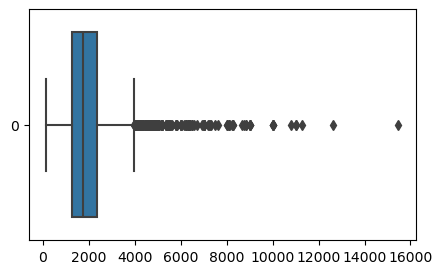

In [118]:
sns.boxplot(df['area'] , orient = 'h')

C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='area', ylabel='Density'>

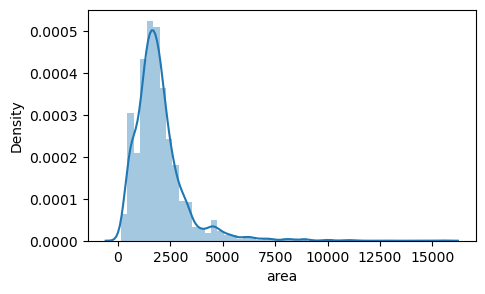

In [119]:
sns.distplot(df['area'])

In [130]:
df.loc[[ 295 , 805 , 1336 , 2579 , 3079 ]].apply(lambda x : (x['price']*10000000)/x['area'] , axis = 1)

295     17931.034483
805     16727.272727
1336    23496.240602
2579    12586.206897
3079    19298.245614
dtype: float64

In [132]:
df.loc[[295 , 805 , 1336 , 2579 , 3079],'price_per_sqft'] = df.loc[[ 295 , 805 , 1336 , 2579 , 3079 ]].apply(lambda x : (x['price']*10000000)/x['area'] , axis = 1)

In [133]:
df.loc[[ 295 , 805 , 1336 , 2579 , 3079 ]]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
295,house,dlf city plot phase 4,sector 28,13.00,17931.034483,7250.0,carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,undefined,NaN,NaN,7250.0,0,0,0,0,0,0,0
805,house,independent,sector 26,18.40,16727.272727,11000.0,plot area 502(419.74 sq.m.)carpet area: 11000 ...,6,8,3+,4.0,South,relatively new,NaN,NaN,11000.0,0,1,1,1,0,1,60
1336,house,independent,sector 57,6.25,23496.240602,2660.0,plot area 3100(2591.99 sq.m.)built up area: 26...,9,9,3+,3.0,North-East,new property,NaN,2660.0,2500.0,0,1,0,0,0,1,61
2579,house,independent,sector 25,7.30,12586.206897,5800.0,plot area 215(179.77 sq.m.)built up area: 5800...,9,9,2,3.0,North-West,relatively new,NaN,5800.0,5200.0,0,1,1,0,0,1,109
3079,house,independent,sector 43,5.50,19298.245614,2850.0,plot area 215(179.77 sq.m.)built up area: 2850...,8,7,3+,3.0,East,moderately old,NaN,2850.0,2250.0,1,1,0,1,1,1,123


In [137]:
df.price_per_sqft = df.price_per_sqft.apply(lambda x : round(x , 1))

<Axes: >

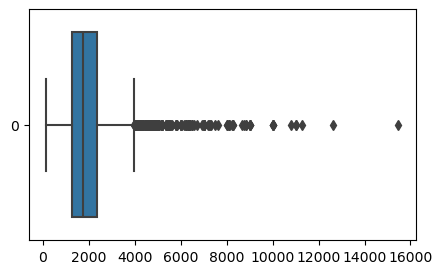

In [138]:
sns.boxplot(df.area , orient = 'h')

In [140]:
df[df.area>10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
736,house,independent,sohna road road,5.50,5093.0,10799.0,plot area 1200(1003.35 sq.m.)built up area: 35...,3,3,3+,2.0,West,moderately old,NaN,3500.0,NaN,1,1,0,1,1,0,49
805,house,independent,sector 26,18.40,16727.3,11000.0,plot area 502(419.74 sq.m.)carpet area: 11000 ...,6,8,3+,4.0,South,relatively new,NaN,NaN,11000.00,0,1,1,1,0,1,60
2277,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,moderately old,NaN,NaN,11000.00,0,1,0,0,0,0,60
2741,house,independent,sector 43,27.50,24366.0,11286.0,plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,relatively new,NaN,11286.0,NaN,1,1,0,1,1,1,42
2979,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,plot area 240(200.67 sq.m.)built up area: 2160...,3,3,1,2.0,North-East,moderately old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
3313,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,carpet area: 1175.11,3,3,3+,6.0,NaN,new property,NaN,NaN,1175.11,0,0,0,0,0,0,55


In [141]:
df.drop(2979  ,inplace = True)

In [142]:
df['area'].describe()

count     3617.000000
mean      1958.436826
std       1238.392228
min        145.000000
25%       1262.000000
50%       1750.000000
75%       2338.000000
max      12645.000000
Name: area, dtype: float64

C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

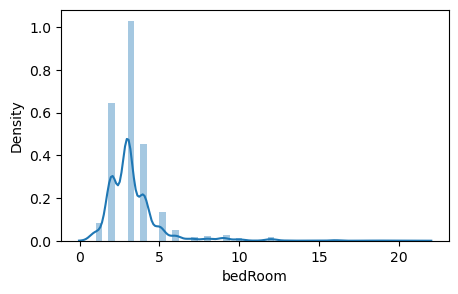

In [143]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

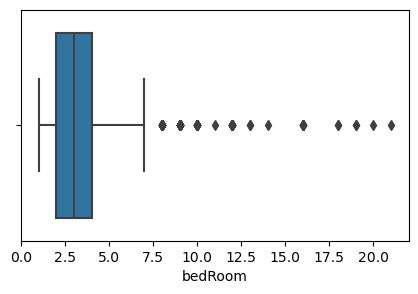

In [144]:
sns.boxplot(x=df['bedRoom'])

In [145]:
df['bedRoom'].describe()

count    3617.000000
mean        3.316561
std         1.793744
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [146]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3475,house,independent,sector 54,5.00,43066.0,1161.0,plot area 129(107.86 sq.m.),21,21,3+,5.0,North,relatively new,NaN,1161.0,NaN,0,1,0,0,0,2,49
2529,house,independent,sector 43,4.50,39062.0,1152.0,plot area 128(107.02 sq.m.),20,20,3+,4.0,East,relatively new,NaN,1152.0,NaN,0,1,0,0,0,2,22
75,house,independent,sector 17a,3.87,5160.0,7500.0,plot area 1623(150.78 sq.m.)built up area: 750...,19,17,3+,5.0,North-West,relatively new,NaN,7500.0,NaN,1,0,1,0,0,0,68
1461,house,independent,sector 17a,3.93,24214.0,1623.0,plot area 1623(150.78 sq.m.)built up area: 162...,19,17,3,4.0,North-West,relatively new,NaN,1622.0,NaN,1,1,1,1,0,0,74
18,house,independent,sector 54,5.50,38194.0,1440.0,plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,relatively new,NaN,1440.0,NaN,0,1,0,0,0,2,70
1359,house,private house,sector 55,7.05,46906.0,1503.0,plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,relatively new,NaN,1503.0,NaN,0,0,0,0,1,2,57
3325,house,independent,sector 56,12.39,45889.0,2700.0,plot area 300(250.84 sq.m.),16,18,3+,4.0,North-East,new property,NaN,2700.0,NaN,0,1,0,1,0,1,49
2080,house,independent,sector 40,12.00,38986.0,3078.0,plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,new property,NaN,3078.0,NaN,1,1,1,1,0,1,0
2041,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,new property,NaN,500.0,NaN,0,1,0,0,0,1,31
1987,house,independent,sector 43,13.50,50000.0,2700.0,plot area 300(250.84 sq.m.),16,16,3+,4.0,North-West,relatively new,NaN,2700.0,NaN,1,1,0,1,1,0,41


In [147]:
df = df[df['bedRoom'] <= 10]

C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bedRoom', ylabel='Density'>

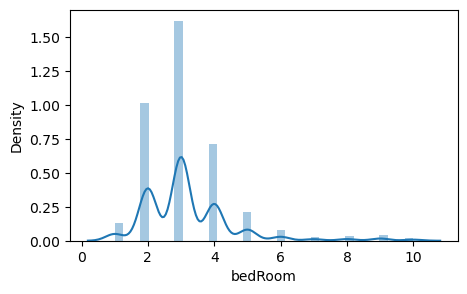

In [148]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

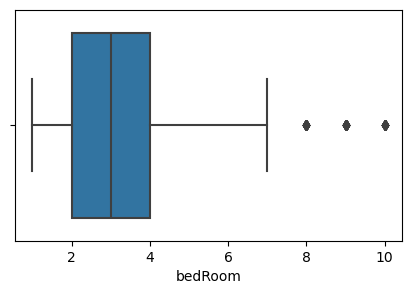

In [149]:
sns.boxplot(x=df['bedRoom'])

C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bathroom', ylabel='Density'>

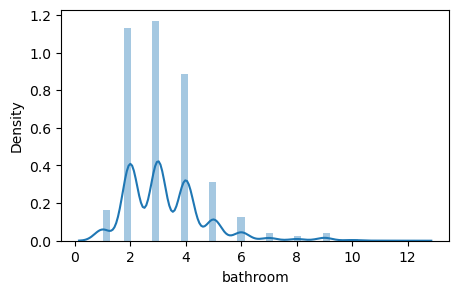

In [150]:
sns.distplot(df['bathroom'])

C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='super_built_up_area', ylabel='Density'>

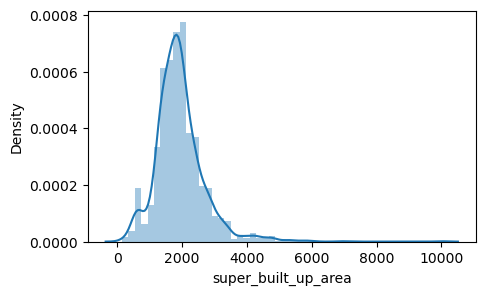

In [151]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

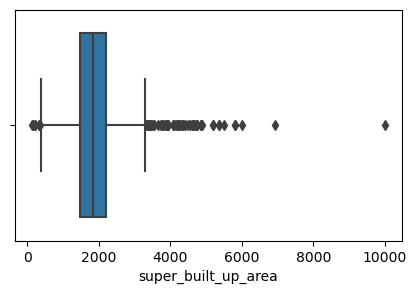

In [152]:
sns.boxplot(x=df['super_built_up_area'])

In [153]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.701093
std        763.320961
min        145.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [154]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1301,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,super built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,relatively new,6926.0,NaN,NaN,0,1,0,0,0,1,140
3147,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,super built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,relatively new,10000.0,NaN,NaN,0,1,0,1,1,0,49


C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='built_up_area', ylabel='Density'>

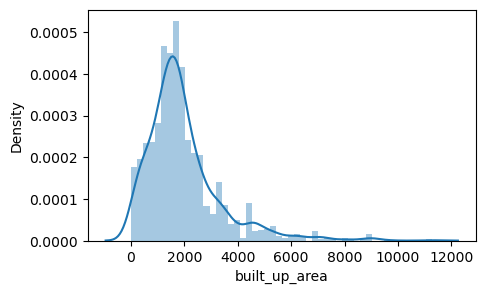

In [155]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

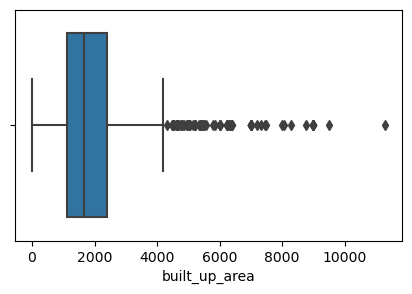

In [156]:
sns.boxplot(x=df['built_up_area'], orient = 'h')

In [157]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2741,house,independent,sector 43,27.5,24366.0,11286.0,plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,relatively new,NaN,11286.0,NaN,1,1,0,1,1,1,42


C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])
C:\Users\vinay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carpet_area', ylabel='Density'>

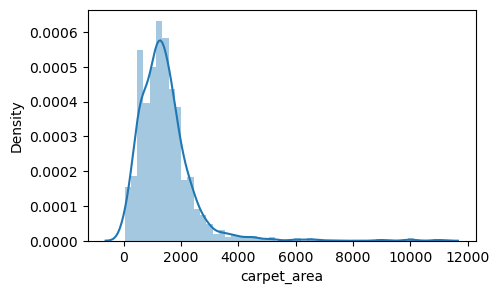

In [158]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

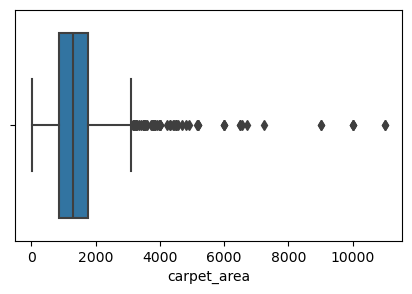

In [159]:
sns.boxplot(x=df['carpet_area'])

In [160]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
805,house,independent,sector 26,18.4,16727.3,11000.0,plot area 502(419.74 sq.m.)carpet area: 11000 ...,6,8,3+,4.0,South,relatively new,NaN,NaN,11000.0,0,1,1,1,0,1,60
2277,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,moderately old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [161]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

C:\Users\vinay\AppData\Local\Temp\ipykernel_4220\3958460563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = round((df['price']*10000000)/df['area'])


<Axes: >

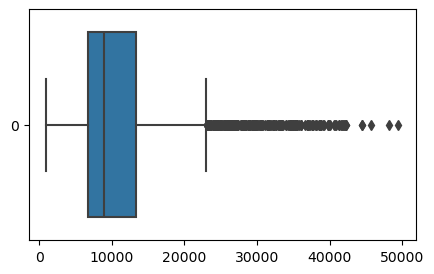

In [163]:
sns.boxplot(df.price_per_sqft,orient = 'h')

In [164]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

195.696

In [168]:
df[(df['area']/df['bedRoom'])<195]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
36,house,independent,sector 104,0.45,12162.0,370.0,plot area 370(34.37 sq.m.)carpet area: 1500 sq...,4,4,2,4.0,North,moderately old,NaN,NaN,1500.0,0,0,0,0,0,1,7
90,house,independent,sector 105,1.10,12222.0,900.0,carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,undefined,NaN,NaN,900.0,0,0,0,0,0,0,0
96,house,independent,sector 4,1.10,11111.0,990.0,built up area: 990 (91.97 sq.m.),6,4,1,2.0,North,undefined,NaN,990.0,NaN,0,0,0,0,0,0,0
182,house,independent,sector 13,1.50,11538.0,1300.0,plot area 1300(120.77 sq.m.),10,7,3,4.0,East,moderately old,NaN,1300.0,NaN,0,0,0,0,0,0,0
211,house,bhawani enclave,sector 12,0.42,8235.0,510.0,plot area 565(52.49 sq.m.)carpet area: 510 sq....,3,3,0,2.0,East,new property,NaN,NaN,510.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,house,independent,sector 12,0.90,13333.0,675.0,built up area: 675 (62.71 sq.m.),4,4,0,2.0,NaN,undefined,NaN,675.0,NaN,0,0,0,0,0,0,0
3565,house,independent,sector 41,4.25,26235.0,1620.0,plot area 180(150.5 sq.m.),10,9,3+,4.0,North,moderately old,NaN,1620.0,NaN,1,1,0,0,0,1,36
3602,house,independent,sector 21,0.45,8411.0,535.0,carpet area: 535 (49.7 sq.m.),3,2,1,1.0,NaN,undefined,NaN,NaN,535.0,0,0,0,0,0,0,0
3621,house,independent,sector 28,0.45,10000.0,450.0,built up area: 50 (4.65 sq.m.),5,3,0,1.0,NaN,undefined,NaN,50.0,NaN,0,0,0,0,0,0,0


In [169]:
df.to_csv('gurgaon_outlier_treated.csv' , index = False)